In [1]:
import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [2]:
#function to import a csv as a 2-dim list
def import_data(filename):
    f = open(filename, "r")
    lines = f.readlines()
    twins = []
    for line in lines:
        line = line.strip('\n')
        data = line.split(",")
        for i in range(len(data)):
            try:
                data[i] = int(data[i])
            except ValueError:
                try:
                    data[i] = float(data[i])
                except ValueError:
                    data[i] = data[i]
                    
        twins += [data] 
    
    return twins

#import dataset
twins = import_data("Blake_RPD_Dataset-1_Twins.csv")

#seperate headers
headers = twins[0]
TRIAL_START=20
TRIAL_END=len(headers)-1

print("headers:\n", headers, "\n")

twins = twins[1:]

# remove rows with blank entries
data_cleaned = []
for row in twins:
    valid = True
    for item in row:
        if item == "" or item == " ":
            valid = False
    if valid: 
        data_cleaned.append(row)
        
twins = data_cleaned
print("number of twins:", len(twins))


headers:
 ['Twin_ID', 'Age_yrs', 'Education_level', 'Income_level', 'Gender', 'Random_twin_split', 'P-SDQ_Emo', 'P-SDQ_Conduct', 'P-SDQ_Hyper', 'P-SDQ_Peer', 'P-SDQ_Procosial', 'P-SDQ_Total_Problems', 'P-EATQ_Aggression', 'C-EATQ_Aggression', 'C_IBSbully', 'C_IBSvictim', 'C_IBSfight', 'Bully_Fight', 'Bully_Victim', 'C_IBS_Total', 'Partner1;1', 'T', '1;2', 'T', '1;3', 'T', '1;4', 'T', '1;5', 'T', '1;6', 'T', '1;7', 'T', '1;8', 'T', '1;9', 'T', '1;10', 'T', 'Partner2;1', 'T', '2;2', 'T', '2;3', 'T', '2;4', 'T', '2;5', 'T', '2;6', 'T', '2;7', 'T', '2;8', 'T', '2;9', 'T', '2;10', 'T', 'Partner3;1', 'T', '3;2', 'T', '3;3', 'T', '3;4', 'T', '3;5', 'T', '3;6', 'T', '3;7', 'T', '3;8', 'T', '3;9', 'T', '3;10', 'T'] 

number of twins: 201


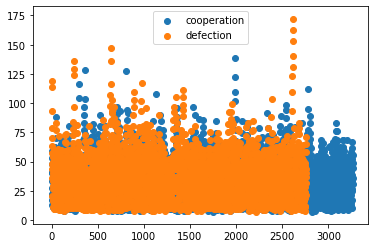

In [3]:
#seperate reaction times for cooperation vs defection
coop_rt = []
defect_rt = []

for twin in twins:
    c=TRIAL_START
    while c<TRIAL_END:
        if twin[c][1] == "C":
            coop_rt.append(twin[c+1])
        else:
            defect_rt.append(twin[c+1])
        c+=2

#plot distributions
x_coop = range(len(coop_rt))
x_defect = range(len(defect_rt))

plt.scatter(x_coop,coop_rt, label="cooperation")
plt.scatter(x_defect,defect_rt, label="defection")
plt.legend(loc="upper center")
plt.show()

In [4]:
def getAvgRT(col):
    coop_avgs = {}
    for twin in twins:
        i = twin[col]
        c = TRIAL_START
        while c<TRIAL_END:
            if i in coop_avgs:
                if twin[c][1] == "C":
                    coop_avgs[i] += [twin[c+1]]
            else:
                if twin[c][1] == "C":
                    coop_avgs[i] = [twin[c+1]]
            c+=2
    
    defect_avgs = {}
    for twin in twins:
        i = twin[col]
        c = TRIAL_START
        while c<TRIAL_END:
            if i in defect_avgs:
                if twin[c][1] == "D":
                    defect_avgs[i] += [twin[c+1]]
            else:
                if twin[c][1] == "D":
                    defect_avgs[i] = [twin[c+1]]
            c+=2
    
    for key in coop_avgs:
        coop_avgs[key] = sum(coop_avgs[key])/len(coop_avgs[key])
    for key in defect_avgs:
        defect_avgs[key] = sum(defect_avgs[key])/len(defect_avgs[key])
    
    return coop_avgs,defect_avgs
    
def plotAvgs(col, xlabel, ylabel, title):
    coop_avgs,defect_avgs = getAvgRT(col)
    coop_agg_avgs,defect_agg_avgs = coop_avgs.items(),defect_avgs.items()
    coop_agg_avgs,defect_agg_avgs = sorted(coop_agg_avgs),sorted(defect_agg_avgs)
    coop_x, coop_y = zip(*coop_agg_avgs)
    defect_x, defect_y = zip(*defect_agg_avgs)

    plt.plot(coop_x, coop_y, label = "cooperate")
    plt.plot(defect_x, defect_y, label = "defect")
    plt.legend(loc="upper right")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()


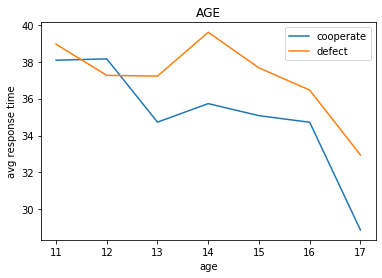

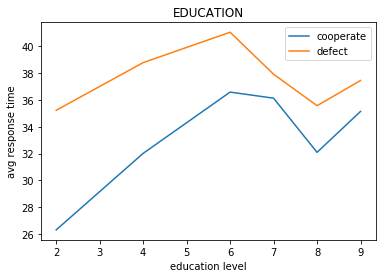

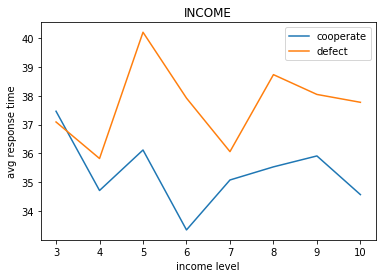

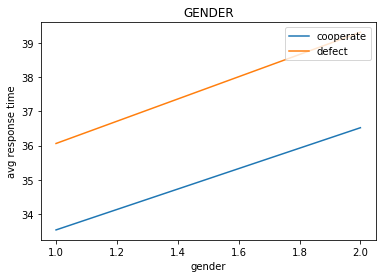

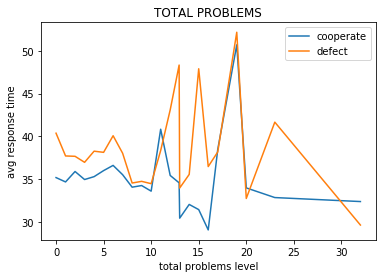

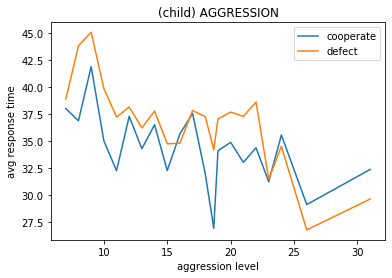

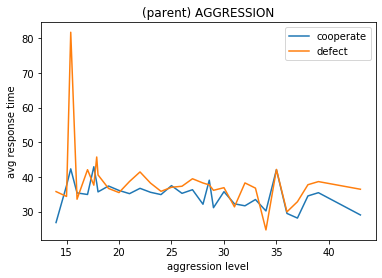

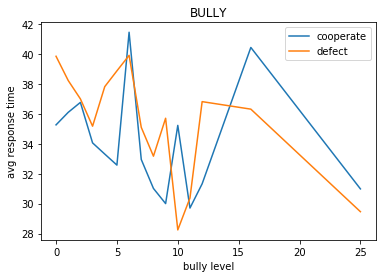

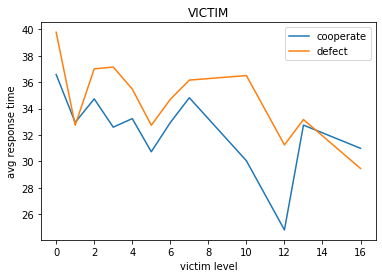

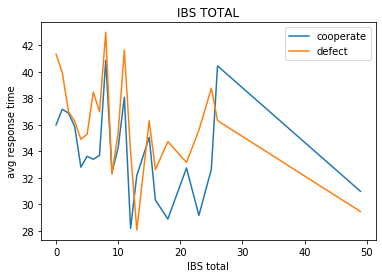

In [5]:
plotAvgs(1, "age", "avg response time", "AGE")
plotAvgs(2, "education level", "avg response time", "EDUCATION")
plotAvgs(3, "income level", "avg response time", "INCOME")
plotAvgs(4, "gender", "avg response time", "GENDER")
plotAvgs(11, "total problems level", "avg response time", "TOTAL PROBLEMS")
plotAvgs(12, "aggression level", "avg response time", "(child) AGGRESSION")
plotAvgs(13, "aggression level", "avg response time", "(parent) AGGRESSION")
plotAvgs(14, "bully level", "avg response time", "BULLY")
plotAvgs(15, "victim level", "avg response time", "VICTIM")
plotAvgs(19, "IBS total", "avg response time", "IBS TOTAL")

In [6]:
# calculate relative rt's and counts (coop rt / defect rt, coop count / defect count)
# DO NOT RUN MORE THAN ONCE

for twin in twins:
    coop = 0
    defect = 0
    coop_rt = []
    defect_rt = []
    c = TRIAL_START
    while c<TRIAL_END:
        if twin[c][1] == "C":
            coop += 1
            coop_rt += [twin[c+1]]
        else:
            defect += 1
            defect_rt += [twin[c+1]]
        c+=2
        
    coop_rt_avg, defect_rt_avg = sum(coop_rt)/len(coop_rt), sum(defect_rt)/len(defect_rt)
    twin.append(coop_rt_avg / defect_rt_avg)
    twin.append(coop/defect)
    
headers.append("relative decision count")
headers.append("relative rt")

TRIAL_END += 2

In [7]:
print(len(twins[1]))
print(TRIAL_END)

82
81


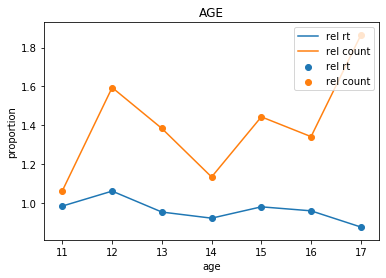

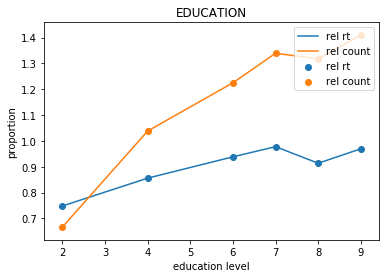

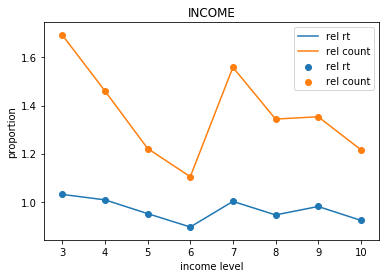

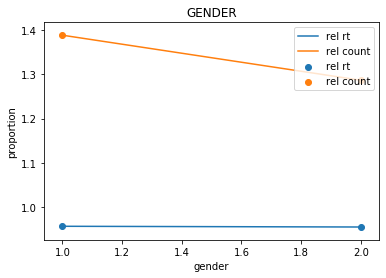

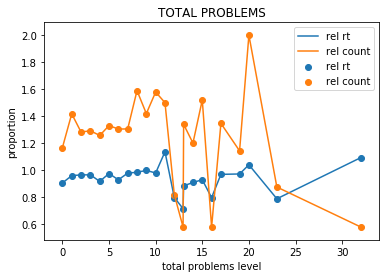

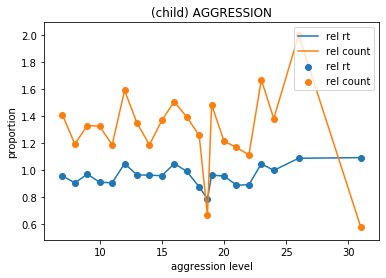

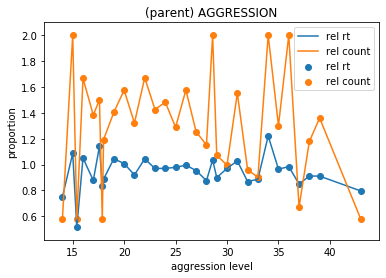

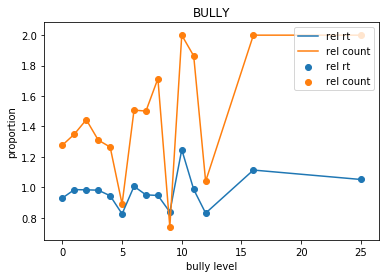

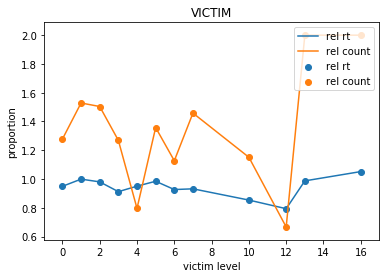

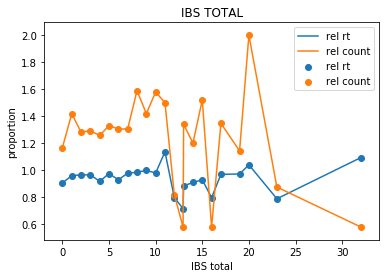

In [8]:
# plot relative distributions
def getRelAvg(col):
    rt_avgs = {}
    count_avgs = {}
    for twin in twins:
        i = twin[col]
        if i in rt_avgs:
            rt_avgs[i] += [twin[TRIAL_END-1]]
            count_avgs[i] += [twin[TRIAL_END]]
        else:
            rt_avgs[i] = [twin[TRIAL_END-1]]
            count_avgs[i] = [twin[TRIAL_END]]
    
    for key in rt_avgs:
        rt_avgs[key] = sum(rt_avgs[key])/len(rt_avgs[key])
    for key in count_avgs:
        count_avgs[key] = sum(count_avgs[key])/len(count_avgs[key])
    
    return rt_avgs,count_avgs

def plotRelAvgs(col, xlabel, title):
    rt_avgs,count_avgs = getRelAvg(col)
    rt_agg_avgs,count_agg_avgs = rt_avgs.items(),count_avgs.items()
    rt_agg_avgs,count_agg_avgs = sorted(rt_agg_avgs),sorted(count_agg_avgs)
    rt_x, rt_y = zip(*rt_agg_avgs)
    count_x, count_y = zip(*count_agg_avgs)
    
    plt.plot(rt_x, rt_y, label = "rel rt")
    plt.plot(count_x, count_y, label = "rel count")
    plt.scatter(rt_x, rt_y, label = "rel rt")
    plt.scatter(count_x, count_y, label = "rel count")
    plt.legend(loc="upper right")
    plt.xlabel(xlabel)
    plt.ylabel("proportion")
    plt.title(title)
    plt.show()

plotRelAvgs(1,"age", "AGE")
plotRelAvgs(2,"education level", "EDUCATION")
plotRelAvgs(3,"income level", "INCOME")
plotRelAvgs(4,"gender", "GENDER")
plotRelAvgs(11,"total problems level", "TOTAL PROBLEMS")
plotRelAvgs(12,"aggression level", "(child) AGGRESSION")
plotRelAvgs(13,"aggression level", "(parent) AGGRESSION")
plotRelAvgs(14,"bully level", "BULLY")
plotRelAvgs(15,"victim level", "VICTIM")
plotRelAvgs(11,"IBS total", "IBS TOTAL")

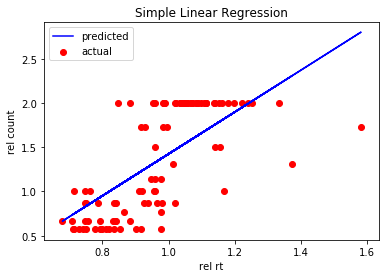

TypeError: mean_squared_error() got an unexpected keyword argument 'squared'

In [9]:
#split twins for training and testing
twins1 = []
twins2 = []

for twin in twins:
    if twin[5] == 1:
        twins1 += [twin]
    else:
        twins2 += [twin]

# simple linear regression model (rel rt against rel count)
x_twins1 = np.array([twin[TRIAL_END-1] for twin in twins1])
x_twins1 = x_twins1.reshape(-1,1)
y_twins1 = np.array([twin[TRIAL_END] for twin in twins1])
y_twins1 = y_twins1.reshape(-1,1)

x_twins2 = np.array([twin[TRIAL_END-1] for twin in twins2])
x_twins2 = x_twins2.reshape(-1,1)
y_twins2 = np.array([twin[TRIAL_END] for twin in twins2])
y_twins2 = y_twins2.reshape(-1,1)


regr = linear_model.LinearRegression()
regr.fit(x_twins1, y_twins1)
y_pred_twins2 = regr.predict(x_twins2)

plt.scatter(x_twins2, y_twins2, color='red', label="actual")
plt.plot(x_twins2, y_pred_twins2, color='blue', label="predicted")
plt.legend(loc="upper left")
plt.xlabel("rel rt")
plt.ylabel("rel count")
plt.title("Simple Linear Regression")
plt.show()

rms = mean_squared_error(y_twins2, y_pred_twins2, squared=False)
print("root mean error =", rms)

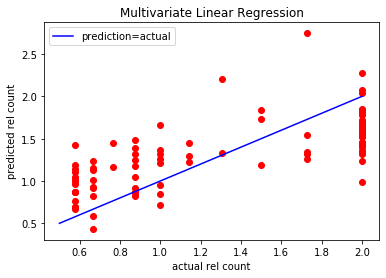

TypeError: mean_squared_error() got an unexpected keyword argument 'squared'

In [10]:
# Multivariate Linear Regression
x_twins1 = np.array([[twin[TRIAL_END-1] for twin in twins1], [twin[1] for twin in twins1], [twin[2] for twin in twins1], \
                    [twin[3] for twin in twins1], [twin[12] for twin in twins1]])
x_twins1 = np.transpose(x_twins1)
y_twins1 = np.array([twin[TRIAL_END] for twin in twins1])

x_twins2 = np.array([[twin[TRIAL_END-1] for twin in twins2], [twin[1] for twin in twins2], [twin[2] for twin in twins2], \
                     [twin[3] for twin in twins2], [twin[12] for twin in twins2]])
x_twins2 = np.transpose(x_twins2)
y_twins2 = np.array([twin[TRIAL_END] for twin in twins2])


regr = linear_model.LinearRegression()
regr.fit(x_twins1, y_twins1)
y_pred_twins2 = regr.predict(x_twins2)

plt.scatter(y_twins2, y_pred_twins2, color='red')
plt.plot([.5,2],[.5,2], color='blue', label='prediction=actual')
plt.legend(loc="upper left")
plt.xlabel("actual rel count")
plt.ylabel("predicted rel count")
plt.title("Multivariate Linear Regression")
plt.show()

rms = mean_squared_error(y_twins2, y_pred_twins2, squared=False)
print("root mean error =", rms)



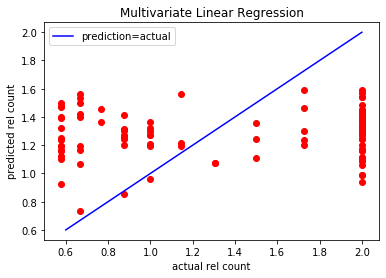

TypeError: mean_squared_error() got an unexpected keyword argument 'squared'

In [11]:
# Multivariate Linear Regression
x_twins1 = np.array([[twin[1] for twin in twins1], [twin[2] for twin in twins1], [twin[3] for twin in twins1], \
                     [twin[12] for twin in twins1], [twin[11] for twin in twins1], [twin[14] for twin in twins1], \
                     [twin[15] for twin in twins1]])
x_twins1 = np.transpose(x_twins1)
y_twins1 = np.array([twin[TRIAL_END] for twin in twins1])

x_twins2 = np.array([[twin[1] for twin in twins2], [twin[2] for twin in twins2], [twin[3] for twin in twins2], \
                     [twin[12] for twin in twins2], [twin[11] for twin in twins2], [twin[14] for twin in twins2], \
                     [twin[15] for twin in twins2]])
x_twins2 = np.transpose(x_twins2)
y_twins2 = np.array([twin[TRIAL_END] for twin in twins2])


regr = linear_model.LinearRegression()
regr.fit(x_twins1, y_twins1)
y_pred_twins2 = regr.predict(x_twins2)

plt.scatter(y_twins2, y_pred_twins2,  color='red')
plt.plot([.6,2],[.6,2], color='blue', label='prediction=actual')
plt.legend(loc="upper left")
plt.xlabel("actual rel count")
plt.ylabel("predicted rel count")
plt.title("Multivariate Linear Regression")
plt.show()

rms = mean_squared_error(y_twins2, y_pred_twins2, squared=False)
print("root mean error =", rms)

In [12]:
#headers was incorrect, need to swap last two above to avoid confusion
headers[-1] = "relative_decision_count"
headers[-2] = "relative_reaction_time"
print(headers)
print()

#convert relevant twins columns to dictionary to feed into data frame
cols = [1,2,3,4,6,7,8,9,10,11,12,13,14,15,16,17,18,19,len(headers)-1]
dic = {}
for col in cols:
    dic[headers[col]] = [twins[0][col]]
for twin in twins:
    for col in cols:
        dic[headers[col]] += [twin[col]]

# create pandas data frame
twins_df = pd.DataFrame(dic, columns = [header for header in dic])
print(twins_df)

['Twin_ID', 'Age_yrs', 'Education_level', 'Income_level', 'Gender', 'Random_twin_split', 'P-SDQ_Emo', 'P-SDQ_Conduct', 'P-SDQ_Hyper', 'P-SDQ_Peer', 'P-SDQ_Procosial', 'P-SDQ_Total_Problems', 'P-EATQ_Aggression', 'C-EATQ_Aggression', 'C_IBSbully', 'C_IBSvictim', 'C_IBSfight', 'Bully_Fight', 'Bully_Victim', 'C_IBS_Total', 'Partner1;1', 'T', '1;2', 'T', '1;3', 'T', '1;4', 'T', '1;5', 'T', '1;6', 'T', '1;7', 'T', '1;8', 'T', '1;9', 'T', '1;10', 'T', 'Partner2;1', 'T', '2;2', 'T', '2;3', 'T', '2;4', 'T', '2;5', 'T', '2;6', 'T', '2;7', 'T', '2;8', 'T', '2;9', 'T', '2;10', 'T', 'Partner3;1', 'T', '3;2', 'T', '3;3', 'T', '3;4', 'T', '3;5', 'T', '3;6', 'T', '3;7', 'T', '3;8', 'T', '3;9', 'T', '3;10', 'T', 'relative_reaction_time', 'relative_decision_count']

     Age_yrs  Education_level  Income_level  Gender  P-SDQ_Emo  P-SDQ_Conduct  \
0         15                7             9       1        1.0            0.0   
1         15                7             9       1        1.0            0.0 

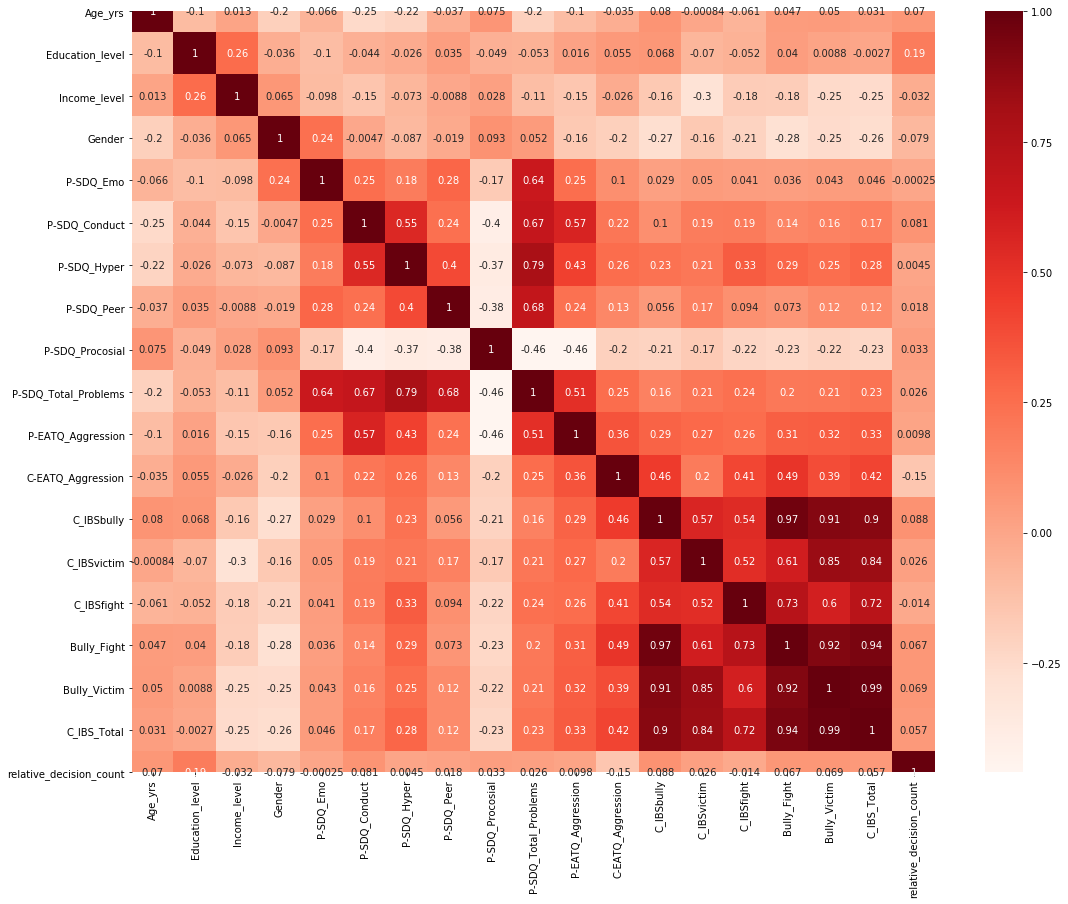

In [13]:
#observe correlation matrix
corrMatrix = twins_df.corr()
plt.figure(figsize=(18,14))
sns.heatmap(corrMatrix, annot=True, cmap=plt.cm.Reds)
plt.show()

Best alpha using built-in LassoCV: 0.091742
Best score using built-in LassoCV: 0.074202
Lasso picked 4 variables and eliminated the other 14 variables


C:\Users\rshni\anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\rshni\anaconda3\envs\tf2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.1689778142474765, tolerance: 0.004449324312445586
  tol, rng, random, positive)
C:\Users\rshni\anaconda3\envs\tf2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007886420350700973, tolerance: 0.004803020873506456
  tol, rng, random, positive)
C:\Users\rshni\anaconda3\envs\tf2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not conver

Text(0.5, 1.0, 'Feature importance using Lasso Model')

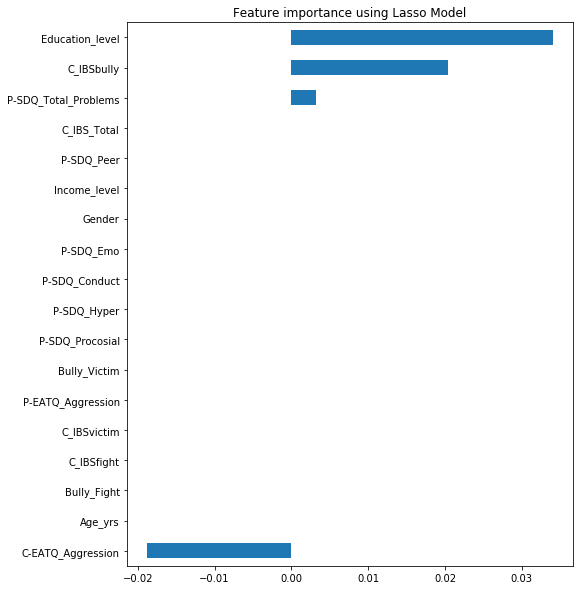

In [14]:
#using lasso regularization for variable selection
reg = linear_model.LassoCV()
X = twins_df.iloc[:, : len(cols)-1]
y = twins_df.iloc[:, len(cols)-1]

reg.fit(X,y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [18]:
import statsmodels.api as sm

mod = sm.OLS(y,X)
fii = mod.fit()
p_values = fii.summary2().tables[1]['P>|t|']
print(fii.summary2().tables)
print()
print(p_values)

[                         0                        1  \
0                   Model:                      OLS   
1      Dependent Variable:  relative_decision_count   
2                    Date:         2021-04-25 21:30   
3        No. Observations:                      202   
4                Df Model:                       15   
5            Df Residuals:                      187   
6  R-squared (uncentered):                    0.859   

                              2         3  
0  Adj. R-squared (uncentered):     0.847  
1                          AIC:  359.1138  
2                          BIC:  408.7378  
3               Log-Likelihood:   -164.56  
4                  F-statistic:     75.65  
5           Prob (F-statistic):  6.51e-71  
6                        Scale:   0.32257  ,                          Coef.  Std.Err.         t     P>|t|    [0.025  \
Age_yrs               0.072592  0.022100  3.284666  0.001219  0.028994   
Education_level       0.090292  0.026106  3.458642  0.000

Statistically significant predictors of relative decision count:

1) Education Level

2) Age

3) Self reported aggression score

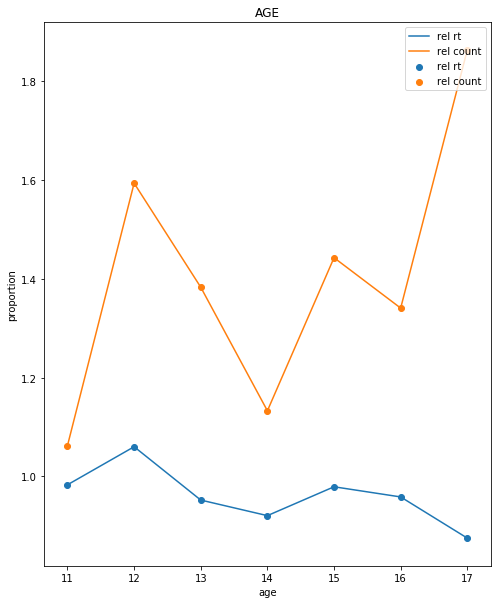

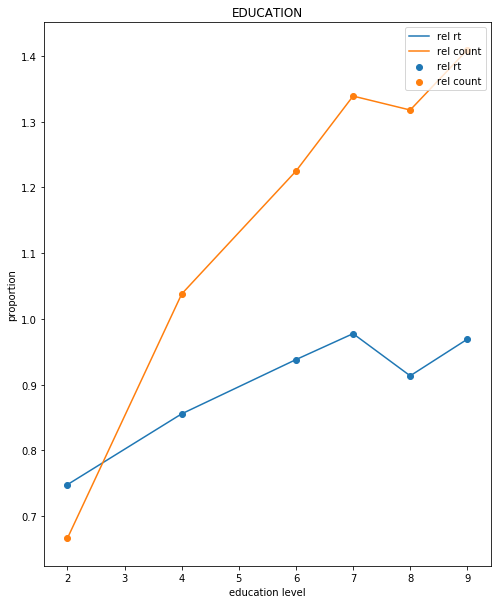

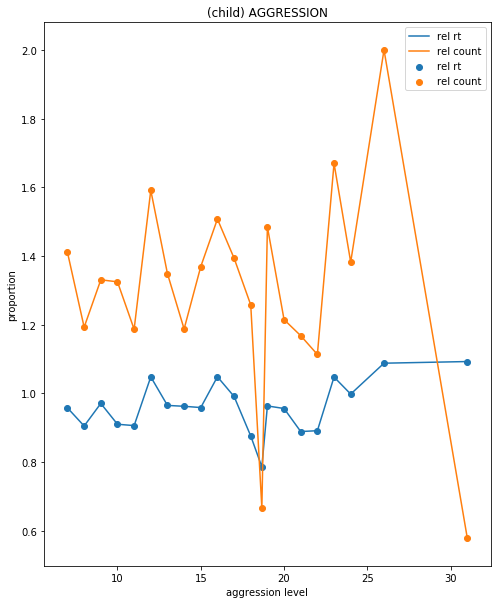

In [16]:
plotRelAvgs(1,"age", "AGE")
plotRelAvgs(2,"education level", "EDUCATION")
plotRelAvgs(12,"aggression level", "(child) AGGRESSION")

In [22]:
#lasso variables
X_lasso = X[['Education_level', 'C_IBSbully', 'P-SDQ_Total_Problems', 'C-EATQ_Aggression']]

print(X_lasso)

mod = sm.OLS(y,X_lasso)
fii = mod.fit()
p_values = fii.summary2().tables[1]['P>|t|']

print(p_values)

     Education_level  C_IBSbully  P-SDQ_Total_Problems  C-EATQ_Aggression
0                  7           2                   1.0               23.0
1                  7           2                   1.0               23.0
2                  7           1                   1.0               19.0
3                  9           1                   5.0               21.0
4                  9           0                   5.0               24.0
..               ...         ...                   ...                ...
197                6           5                   1.0               29.0
198                6           0                   3.0               20.0
199                6           1                   3.0               14.0
200                9          10                   4.0               22.0
201                9           3                   4.0               20.0

[202 rows x 4 columns]
Education_level         3.173060e-15
C_IBSbully              2.489705e-01
P-SDQ_Total_Pr

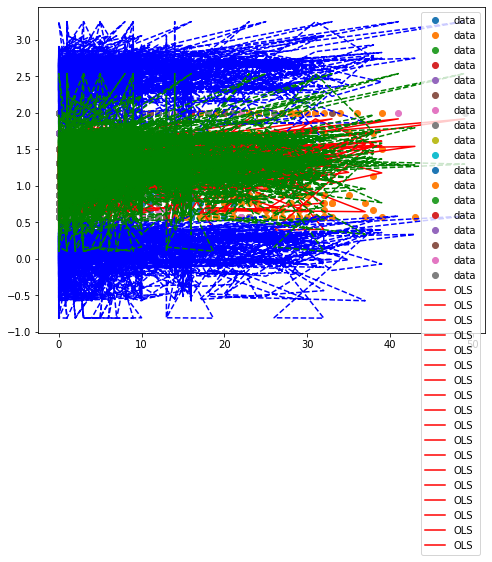

In [24]:
from statsmodels.stats.outliers_influence import summary_table

#plotting confidence band
res = fii
st, data, ss2 = summary_table(res, alpha=0.05)
fittedvalues = data[:,2]
predict_mean_se  = data[:,3]
predict_mean_ci_low, predict_mean_ci_upp = data[:,4:6].T
predict_ci_low, predict_ci_upp = data[:,6:8].T

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(X, y, 'o', label="data")
ax.plot(X, fittedvalues, 'r-', label='OLS')
ax.plot(X, predict_ci_low, 'b--')
ax.plot(X, predict_ci_upp, 'b--')
ax.plot(X, predict_mean_ci_low, 'g--')
ax.plot(X, predict_mean_ci_upp, 'g--')
ax.legend(loc='best');
plt.show()